В этом наборе данных содержится информация о лесных пожарах, произошедших в Мексике. В нём указаны географическое положение, продолжительность, даты начала и окончания, типы пожаров, пострадавшая растительность, воздействие на окружающую среду и основные причины, а также другие характеристики. Анализ этих данных крайне важен для борьбы с пожарами и планирования превентивных мер.
Наша задача состоит в том, чтобы угадать причину (категориальный признак) очередного пожара по имеющимся данным.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valamcortes/forest-fire-registry-of-mexico")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'forest-fire-registry-of-mexico' dataset.
Path to dataset files: /kaggle/input/forest-fire-registry-of-mexico


In [5]:
import pandas as pd
#path = "C:\\Users\\USER 1\\.cache\\kagglehub\\datasets\\valamcortes\\forest-fire-registry-of-mexico\\versions\\1"
df = pd.read_csv(path + "//Fires.csv", encoding='latin-1')
df.head()

,Year,Latitude,Longitude,State,Municipality,Region,Property,Start_Date,End_Date,Duration_days,...,Saplings,Shrubs,Herbaceous,Leaf_litter,Total_hectares,Size,Detection,Arrival,Duration,Cause
0,2015,20.369306,-104.546556,Jalisco,Atenguillo,West,El cuatillo,2015-01-01,2015-01-02,2 to 3 Days,...,0.0,0.00,0.0,1.5,1.50,0 to 5 Hectares,00:09:5,00:35:0,07:00:00,Unknown
1,2015,19.307297,-99.092594,Ciudad de México,Xochimilco,Center,Ejidos de Xochimilco,2015-01-01,2015-01-01,1 Day,...,0.0,1.50,0.0,0.0,1.50,0 to 5 Hectares,00:08:0,00:40:0,02:50:00,Illicit Activities
2,2015,19.273358,-99.056281,Ciudad de México,Xochimilco,Center,San Gregorio Atlapulco,2015-01-01,2015-01-01,1 Day,...,0.0,1.00,0.0,0.0,1.00,0 to 5 Hectares,00:04:5,00:15:0,24:20:00,Illicit Activities
3,2015,19.275750,-98.114833,Tlaxcala,Chiautempan,Center,Tlalcuapan,2015-01-01,2015-01-01,1 Day,...,0.0,0.00,0.5,0.0,0.50,0 to 5 Hectares,00:06:0,00:24:5,01:41:00,Livestock Activities
4,2015,19.540444,-97.231556,Veracruz,Perote,Center,Ejido Perote,2015-01-01,2015-01-01,1 Day,...,0.0,0.25,0.0,0.0,0.25,0 to 5 Hectares,00:20:0,00:35:0,25:59:59,Smokers


In [6]:
df.shape

(61072, 25)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61072 entries, 0 to 61071
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             61072 non-null  int64  
 1   Latitude         61072 non-null  float64
 2   Longitude        61072 non-null  float64
 3   State            61072 non-null  object 
 4   Municipality     61072 non-null  object 
 5   Region           61072 non-null  object 
 6   Property         61072 non-null  object 
 7   Start_Date       61072 non-null  object 
 8   End_Date         61072 non-null  object 
 9   Duration_days    61072 non-null  object 
 10  Type_of_fire     61072 non-null  object 
 11  Vegetation_type  61072 non-null  object 
 12  Fire_regime      61072 non-null  object 
 13  Impact_type      61072 non-null  object 
 14  Adult_trees      61072 non-null  float64
 15  Saplings         61072 non-null  float64
 16  Shrubs           61072 non-null  float64
 17  Herbaceous  

# Разведочный анализ

In [7]:
df.columns

Index(['Year', 'Latitude', 'Longitude', 'State', 'Municipality', 'Region',
       'Property', 'Start_Date', 'End_Date', 'Duration_days', 'Type_of_fire',
       'Vegetation_type', 'Fire_regime', 'Impact_type', 'Adult_trees',
       'Saplings', 'Shrubs', 'Herbaceous', 'Leaf_litter', 'Total_hectares',
       'Size', 'Detection', 'Arrival', 'Duration', 'Cause'],
      dtype='object')

In [8]:
df.describe()

,Year,Latitude,Longitude,Adult_trees,Saplings,Shrubs,Herbaceous,Leaf_litter,Total_hectares
count,61072.000000,61072.000000,61072.000000,61072.000000,61072.000000,61072.000000,61072.000000,61072.000000,61072.000000
mean,2019.108184,20.593530,-100.816645,1.935011,1.721674,18.410807,29.662236,23.600303,79.552471
std,2.489414,3.201940,4.388251,38.571742,19.503650,168.918134,261.729694,167.492525,503.949882
min,2015.000000,14.696064,-118.286697,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2017.000000,19.119415,-103.558891,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
50%,2019.000000,19.551993,-99.928889,0.000000,0.000000,0.500000,1.000000,0.000000,5.000000
75%,2021.000000,20.892261,-98.714514,0.000000,0.000000,4.000000,6.000000,3.500000,23.580000
max,2023.000000,32.599875,-86.798778,4893.000000,1271.710000,14555.920000,17220.150000,8717.330000,23809.000000


1) Вполне адекватные показатели для Total_hectares по кол-ву сгоревших гектаров, пожары бывают и большие, и маленькие.
2) Adult_trees, Saplings,	Shrubs,	Herbaceous,	Leaf_litter это кол-ва каждого сгоревшего типа растительности: Взрослые деревья, Саженцы, Кустарники, Травянистые растения, опавшие листья. Нулевые значения здесь вполне естественны, тк 1 пожар в одном конкретном месте врядли затронет все типы. Из статистики видно, что чаще и больше всего горят кустарники, трава и опавшие листья.
3) Широта, долгота и год корректные

In [9]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Latitude', 'Longitude', 'Adult_trees', 'Saplings', 'Shrubs',
       'Herbaceous', 'Leaf_litter', 'Total_hectares'],
      dtype='object')

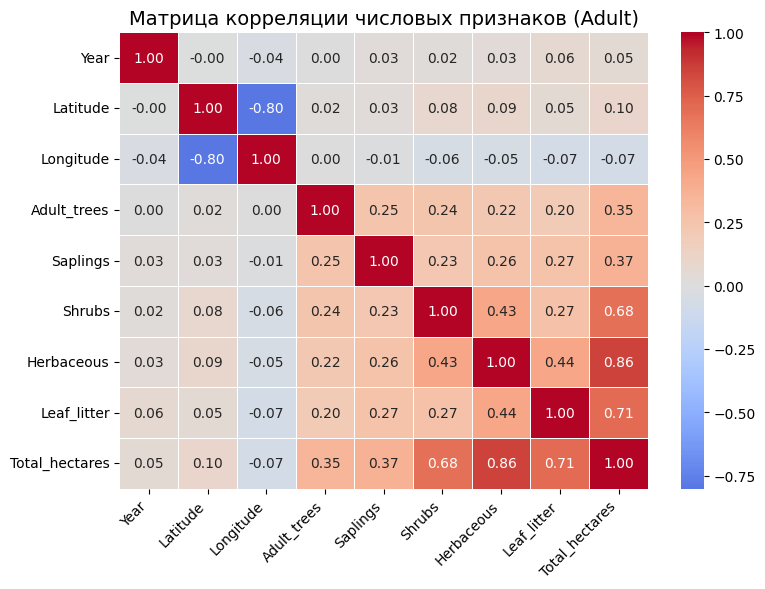

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[numeric_columns].copy()
corr_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
)

plt.title('Матрица корреляции числовых признаков (Adult)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Видно что кол-во сгоревших гектаров (Total_hectares) сильно коррелирует с кол-вом сгоревшей травы (Herbaceous) и листвы (Leaf_litter)

In [11]:
# Подсчёт количества уникальных значений для всех категориальных (object) признаков
unique_counts = df.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

# Вывод результата
print("Количество уникальных значений для категориальных признаков:")
print(unique_counts)

Количество уникальных значений для категориальных признаков:
Property           32276
Duration            3715
End_Date            2588
Start_Date          2561
Municipality        1561
Arrival              880
Detection            551
Vegetation_type       63
State                 32
Cause                 15
Fire_regime            7
Region                 6
Size                   6
Duration_days          4
Type_of_fire           4
Impact_type            4
dtype: int64


Перейдём к последующей обработке полей с типом object. Некоторые из них являются категориальными признаками, а некоторые числовыми.

In [12]:
df['Duration_days'].unique()

array(['2 to 3 Days', '1 Day', '4 to 7 Days', 'More than 7 Days'],
      dtype=object)

Опытным путём была выявлена проблема с Duration. Выяснилось что для большого кол-ва объектов оно не корректно по одному из трёх критериев:
1) Время пожара слишком велико и превышает разницу в датах. Например если дата начала и конца пожара совпадают, то пожар не мог длиться более 24 часов.
2) Время пожара меньше, чем указано в duration_days. Например если значение Duration_days НЕ "1 Day", то пожар не мог длиться менее 24 часов
3) Время пожара равно 0 или близко к нему - не понятно, как это фиксировали и как считать это за пожар.

In [13]:
import pandas as pd
import numpy as np

# 1. Преобразуем даты
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# 2. Парсим Duration в часы
def parse_duration_to_hours(duration_str):
        h, m, s = map(int, duration_str.split(':'))
        return h + m/60 + s/3600

df['Duration_hours'] = df['Duration'].apply(parse_duration_to_hours)

# 3. Разница в днях (целое число дней между датами)
df['date_diff_days'] = (df['End_Date'] - df['Start_Date']).dt.days + 1
#df.drop(df[df['date_diff_days'] < 0].index, inplace=True)

# 4. Максимально возможная продолжительность (в часах)
df['max_possible_hours'] = (df['date_diff_days'] + 1) * 24

# 5. Минимально ожидаемая продолжительность по Duration_days
def get_min_expected_hours(duration_days):
    mapping = {
        '1 Day': 0.0,
        '2 to 3 Days': 24.0,
        '4 to 7 Days': 72.0,
        'More than 7 Days': 168.0
    }
    return mapping.get(duration_days, 0.0)

df['min_expected_hours'] = df['Duration_days'].apply(get_min_expected_hours)

# 6. Флаг несоответствия
tolerance = 1 # 1 час прощаем

df['mismatch'] = (
    # 1. Duration превышает физически возможное
    (df['Duration_hours'] > df['max_possible_hours'] + tolerance) |

    # 2. Duration меньше ожидаемого по Duration_days (с толерансом вниз)
    (df['Duration_hours'] < df['min_expected_hours'] - tolerance) |

    # 3. Duration < 5 минут (0.08333... часов)
    (df['Duration_hours'] <= 5 / 60) |
    False
)

# Итоги
n_total = len(df)
n_mismatch = df['mismatch'].sum()
print(f"Всего записей: {n_total}")
print(f"Несоответствий: {n_mismatch}")
print(f"Доля: {n_mismatch / n_total:.2%}")

# Примеры проблемных записей
print("\nПримеры несоответствий:")
cols = [
    'Start_Date', 'End_Date', 'Duration_days', 'Duration',
    'date_diff_days', 'Duration_hours',
    'min_expected_hours', 'max_possible_hours'
]
problematic = df[df['mismatch']][cols].head(10)
display(problematic)

Всего записей: 61072
Несоответствий: 21926
Доля: 35.90%

Примеры несоответствий:


,Start_Date,End_Date,Duration_days,Duration,date_diff_days,Duration_hours,min_expected_hours,max_possible_hours
0,2015-01-01,2015-01-02,2 to 3 Days,07:00:00,2,7.000000,24.0,72
14,2015-01-04,2015-01-05,2 to 3 Days,03:29:59,2,3.499722,24.0,72
19,2015-01-05,2015-01-06,2 to 3 Days,02:19:59,2,2.333056,24.0,72
26,2015-01-07,2015-01-08,2 to 3 Days,00:54:59,2,0.916389,24.0,72
27,2015-01-07,2015-01-09,2 to 3 Days,00:45:00,3,0.750000,24.0,96
29,2015-01-08,2015-01-09,2 to 3 Days,01:05:00,2,1.083333,24.0,72
30,2015-01-08,2015-01-09,2 to 3 Days,04:39:59,2,4.666389,24.0,72
33,2015-01-09,2015-01-11,2 to 3 Days,02:19:59,3,2.333056,24.0,96
50,2015-01-14,2015-01-15,2 to 3 Days,04:30:00,2,4.500000,24.0,72
58,2015-01-15,2015-01-16,2 to 3 Days,01:09:59,2,1.166389,24.0,72


Терять 26649 объектов мы не хотим, поэтому удалим столбец Duration и вместо этого постараемся извлечь полезную информайцию из Start_Date, End_Date и Duration_days


# Удаление не информативных и некорректных признаков

Подвергнем удалению следующие признаки:
1) Некорректные:
- duration
2) Категориальные со слишком большим кол-вом уникальных значений:
- State (целых 32 значения, лучше обойдёмся координатами широты и долготы)
- Municipality (географически включён в State)
- Region (географически включён в Municipality)
- Property (географически включён в Municipality)
- Vegetation (целых 63 значения, у нас есть много альтернативных источников информации)
3) Неинформативные (заменяются информацией из других признаков):
- Size (кол-во сожженых гектар, категориальный);
вместо Size используем Total_hectares - точное кол-во сожженых гектаров
- Duration_days (вермя пожара, категориально); вместо него посчитаем точнее продолжительность как разницу между началом и концом

In [14]:
df['Size'].unique()

array(['0 to 5 Hectares', '6 to 10 Hectares', '21 to 50 Hectares',
       '11 to 20 Hectares', '51 to 100 Hectares',
       'Greater than 100 Hectares'], dtype=object)

In [15]:
df['Duration_days'].unique()

array(['2 to 3 Days', '1 Day', '4 to 7 Days', 'More than 7 Days'],
      dtype=object)

In [16]:
# Списки столбцов по категориям
to_drop = []
# 1) Некорректные
to_drop += ['Duration']
# 2) Большие и избыточные
to_drop += ['Municipality', 'Region', 'Property', 'State', 'Vegetation_type']
# 3) Заменённые числовыми/временными аналогами
to_drop += ['Size', 'Duration_days']
# 4) Временные, которые мы раньше создали
to_drop += ['max_possible_hours', 'min_expected_hours', 'mismatch', 'Duration_hours']
# # Удаляем
df = df.drop(columns=to_drop)

# Обработка дат и времени

Среди временных признаков необходимо обработать Start_Date, End_Date, Detection и Arrival. Start_Date и End_Date уже преобразованы в даты, необходимо преобразовать Detection и Arrival во время.

In [17]:
df['Detection'] = pd.to_timedelta(df['Detection'])
df['Arrival'] = pd.to_timedelta(df['Arrival'])
# в секунды
df['det_seconds'] = df['Detection'].dt.total_seconds() # float, 0–86399.999
df['arr_seconds'] = df['Arrival'].dt.total_seconds()
df.head()

,Year,Latitude,Longitude,Start_Date,End_Date,Type_of_fire,Fire_regime,Impact_type,Adult_trees,Saplings,Shrubs,Herbaceous,Leaf_litter,Total_hectares,Detection,Arrival,Cause,date_diff_days,det_seconds,arr_seconds
0,2015,20.369306,-104.546556,2015-01-01,2015-01-02,Superficial,Adapted,Minimal Impact,0.0,0.0,0.00,0.0,1.5,1.50,0 days 00:09:05,0 days 00:35:00,Unknown,2,545.0,2100.0
1,2015,19.307297,-99.092594,2015-01-01,2015-01-01,Superficial,Adapted,Minimal Impact,0.0,0.0,1.50,0.0,0.0,1.50,0 days 00:08:00,0 days 00:40:00,Illicit Activities,1,480.0,2400.0
2,2015,19.273358,-99.056281,2015-01-01,2015-01-01,Superficial,Other,Minimal Impact,0.0,0.0,1.00,0.0,0.0,1.00,0 days 00:04:05,0 days 00:15:00,Illicit Activities,1,245.0,900.0
3,2015,19.275750,-98.114833,2015-01-01,2015-01-01,Superficial,Adapted,Minimal Impact,0.0,0.0,0.00,0.5,0.0,0.50,0 days 00:06:00,0 days 00:24:05,Livestock Activities,1,360.0,1445.0
4,2015,19.540444,-97.231556,2015-01-01,2015-01-01,Superficial,Adapted,Minimal Impact,0.0,0.0,0.25,0.0,0.0,0.25,0 days 00:20:00,0 days 00:35:00,Smokers,1,1200.0,2100.0


Использование циклического кодирования также выгодно тем, что мы использукем всего 2 числовых признака вместо множетсва категориальных, таких как время суток (утро, день, вечер, ночь) или время года (Январь, Февраль, ..., Декабрь).

In [18]:
# Применяем циклическое кодирование для идентификации времени суток
def cyclic_encode(seconds_series, period=86400):
    # seconds_series — в секундах, period = 24*3600
    angle = 2 * np.pi * seconds_series / period
    return np.sin(angle), np.cos(angle)
# При таком раскладе 2:59 ночи будут близки к 3:01 утра
df['det_sin'], df['det_cos'] = cyclic_encode(df['det_seconds'])

Новый признак - время регирования (в секундах)

In [19]:
#добавляем новый признак - время реагирования в секундах
df['response'] = (df['Arrival'] - df['Detection']) % pd.Timedelta(days=1)
df['response_second'] = (df['response']).dt.total_seconds()
# таким образом, мы выжали всю важную информацию из Arrival и Detection и можем их удалить (и временные переменные)
df = df.drop(columns = ['Detection', 'Arrival', 'det_seconds', 'arr_seconds'])


Новые признаки - День недели и Вермя года. И последующее применение циклического кодирования.

In [20]:
df['weekday'] = df['Start_Date'].dt.dayofweek
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

df['month'] = df['Start_Date'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61072 entries, 0 to 61071
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Year             61072 non-null  int64          
 1   Latitude         61072 non-null  float64        
 2   Longitude        61072 non-null  float64        
 3   Start_Date       61072 non-null  datetime64[ns] 
 4   End_Date         61072 non-null  datetime64[ns] 
 5   Type_of_fire     61072 non-null  object         
 6   Fire_regime      61072 non-null  object         
 7   Impact_type      61072 non-null  object         
 8   Adult_trees      61072 non-null  float64        
 9   Saplings         61072 non-null  float64        
 10  Shrubs           61072 non-null  float64        
 11  Herbaceous       61072 non-null  float64        
 12  Leaf_litter      61072 non-null  float64        
 13  Total_hectares   61072 non-null  float64        
 14  Cause            61072

# Немного графики

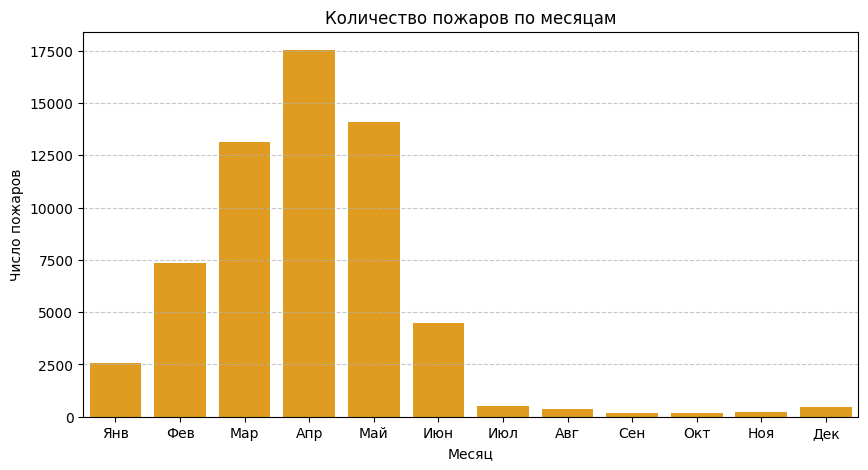

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month', color='orange', order=range(1,13))
plt.title('Количество пожаров по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число пожаров')
plt.xticks(ticks=range(12), labels=['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

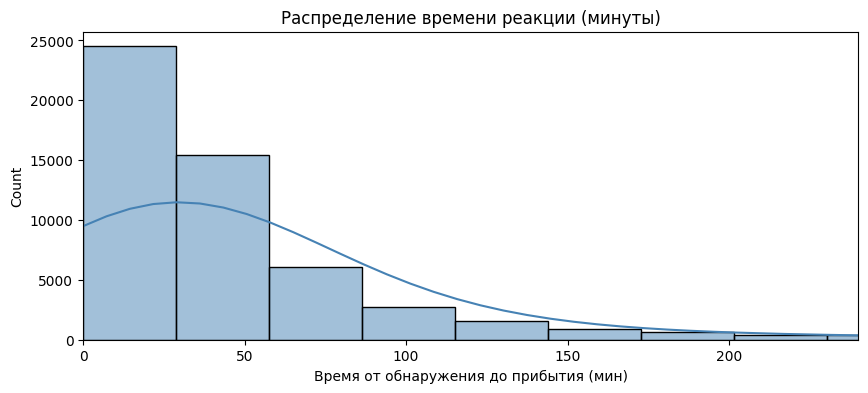

In [23]:
df['response_min'] = df['response_second'] / 60

plt.figure(figsize=(10, 4))
sns.histplot(df['response_min'], bins=50, kde=True, color='steelblue')
plt.title('Распределение времени реакции (минуты)')
plt.xlabel('Время от обнаружения до прибытия (мин)')
plt.xlim(0, 240)  # до 4 часов — основной фокус
plt.show()

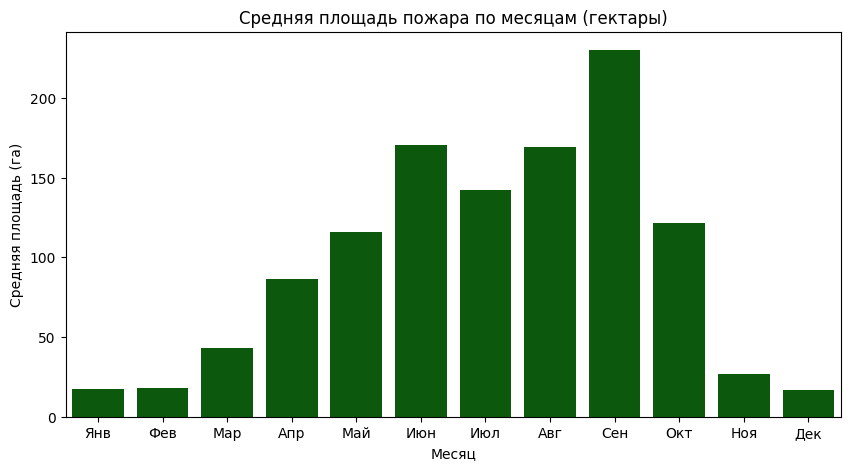

In [24]:
monthly_area = df.groupby('month')['Total_hectares'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_area.index, y=monthly_area.values, color='darkgreen')
plt.title('Средняя площадь пожара по месяцам (гектары)')
plt.xlabel('Месяц')
plt.ylabel('Средняя площадь (га)')
plt.xticks(ticks=range(12), labels=['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек'])
plt.show()

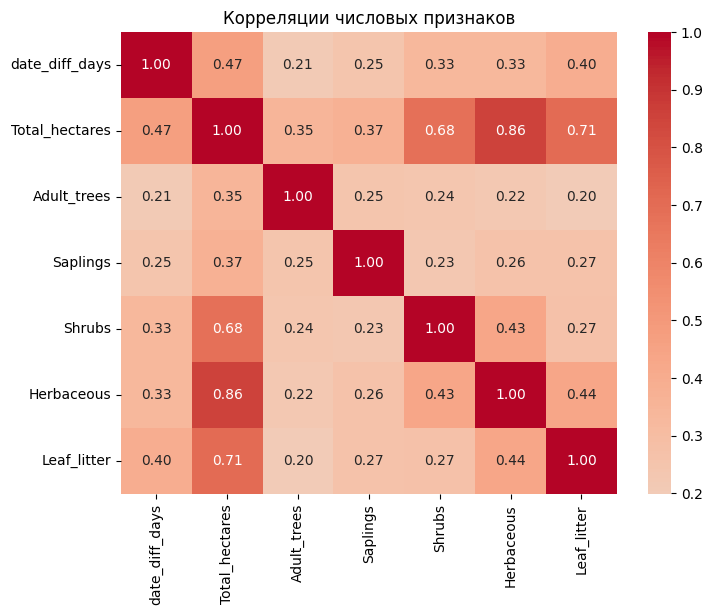

In [25]:
num_cols = ['date_diff_days', 'Total_hectares',
            'Adult_trees', 'Saplings', 'Shrubs', 'Herbaceous', 'Leaf_litter']

corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляции числовых признаков')
plt.show()

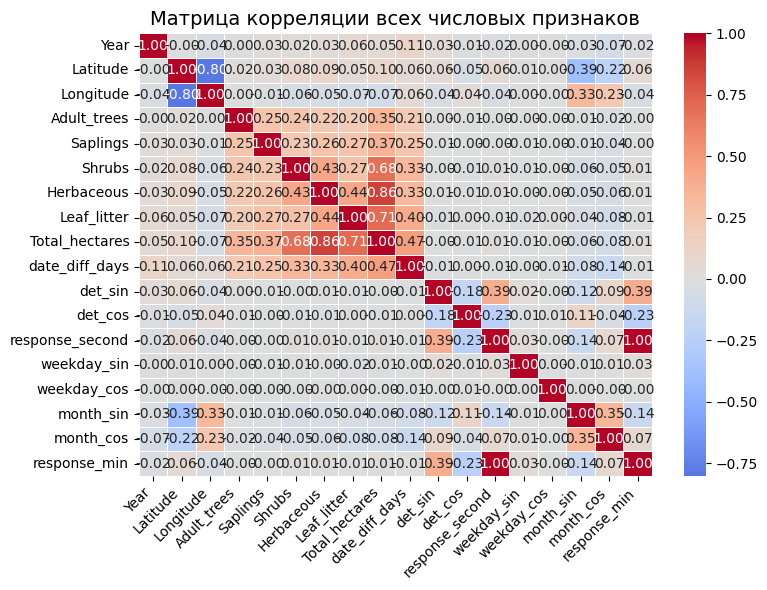

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[numeric_columns].copy()
corr_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
)

plt.title('Матрица корреляции всех числовых признаков', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
mask = df['date_diff_days'] <= 0
df.drop(df[mask].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61071 entries, 0 to 61071
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Year             61071 non-null  int64          
 1   Latitude         61071 non-null  float64        
 2   Longitude        61071 non-null  float64        
 3   Start_Date       61071 non-null  datetime64[ns] 
 4   End_Date         61071 non-null  datetime64[ns] 
 5   Type_of_fire     61071 non-null  object         
 6   Fire_regime      61071 non-null  object         
 7   Impact_type      61071 non-null  object         
 8   Adult_trees      61071 non-null  float64        
 9   Saplings         61071 non-null  float64        
 10  Shrubs           61071 non-null  float64        
 11  Herbaceous       61071 non-null  float64        
 12  Leaf_litter      61071 non-null  float64        
 13  Total_hectares   61071 non-null  float64        
 14  Cause            61071 non-

In [28]:
df['date_diff_days'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,date_diff_days
0.005,1.0
0.010,1.0
0.050,1.0
0.100,1.0
0.500,1.0
0.900,3.0
0.950,5.0
0.990,12.0
0.995,16.0


In [29]:
df['Total_hectares'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Total_hectares
0.005,0.100
0.010,0.127
0.050,0.400
0.100,0.600
0.500,5.000
0.900,110.000
0.950,276.000
0.990,1386.662
0.995,2365.852


In [30]:
df['Total_hectares'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Total_hectares
0.005,0.100
0.010,0.127
0.050,0.400
0.100,0.600
0.500,5.000
0.900,110.000
0.950,276.000
0.990,1386.662
0.995,2365.852


In [31]:
rows_to_drop = df[
    (df['Herbaceous'] < df['Herbaceous'].quantile(0.005)) | (df['Herbaceous'] > df['Herbaceous'].quantile(0.995)) |
    (df['Total_hectares']  < df['Total_hectares' ].quantile(0.005)) | (df['Total_hectares']  > df['Total_hectares' ].quantile(0.995)) |
    (df['date_diff_days'] < df['date_diff_days'].quantile(0.005)) | (df['date_diff_days'] > df['date_diff_days'].quantile(0.995)) |
    (df['date_diff_days'] <= 0)].index
data = df.drop(rows_to_drop)
data.shape

(60286, 27)

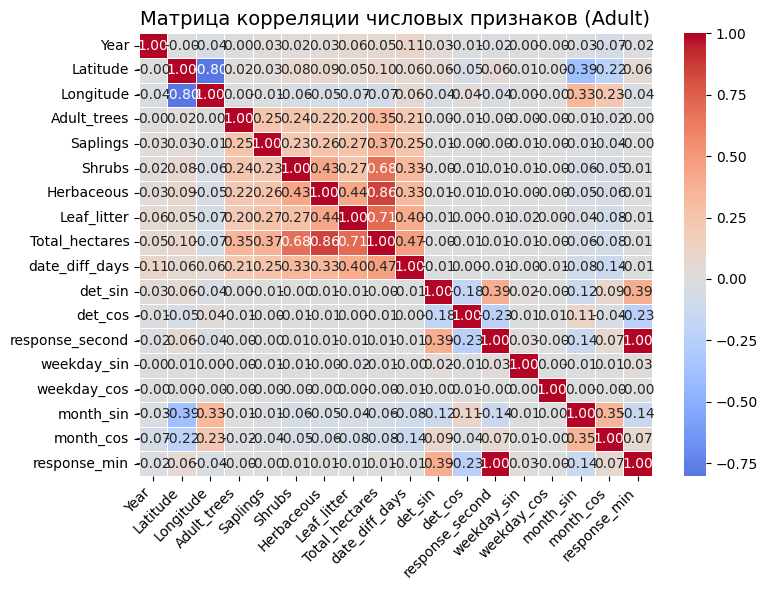

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[numeric_columns].copy()
corr_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
)

plt.title('Матрица корреляции числовых признаков (Adult)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Удалим слишком коррелированные признаки - Total_hectares и Herbaceous

In [33]:
df = df.drop(columns=['Herbaceous', 'Total_hectares'])

In [34]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61071 entries, 0 to 61071
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             61071 non-null  int64  
 1   Latitude         61071 non-null  float64
 2   Longitude        61071 non-null  float64
 3   Adult_trees      61071 non-null  float64
 4   Saplings         61071 non-null  float64
 5   Shrubs           61071 non-null  float64
 6   Herbaceous       61071 non-null  float64
 7   Leaf_litter      61071 non-null  float64
 8   Total_hectares   61071 non-null  float64
 9   date_diff_days   61071 non-null  int64  
 10  det_sin          61071 non-null  float64
 11  det_cos          61071 non-null  float64
 12  response_second  61071 non-null  float64
 13  weekday_sin      61071 non-null  float64
 14  weekday_cos      61071 non-null  float64
 15  month_sin        61071 non-null  float64
 16  month_cos        61071 non-null  float64
 17  response_min     

In [35]:
#Посмотрим на причины пожара
df['Cause'].value_counts()

,count
Cause,
Agricultural Activities,14884
Illicit Activities,13928
Unknown,8585
Bonfires,5705
Livestock Activities,5666
Smokers,3870
Intentional,2625
Hunters,1664
Trash Burning,1363


In [36]:
pd.set_option('display.max_columns', None)
df.describe()

,Year,Latitude,Longitude,Start_Date,End_Date,Adult_trees,Saplings,Shrubs,Leaf_litter,date_diff_days,det_sin,det_cos,response,response_second,weekday,weekday_sin,weekday_cos,month,month_sin,month_cos,response_min
count,61071.000000,61071.000000,61071.000000,61071,61071,61071.000000,61071.000000,61071.000000,61071.00000,61071.000000,61071.000000,61071.000000,61071,61071.000000,61071.000000,61071.000000,61071.000000,61071.000000,61071.000000,6.107100e+04,61071.000000
mean,2019.108186,20.593622,-100.816780,2019-05-24 12:50:02.800019456,2019-05-25 09:49:51.305201920,1.935043,1.721702,18.411108,23.60069,1.874867,0.100148,0.954565,0 days 03:02:43.597403022,10963.597403,2.934994,0.018778,0.021051,3.963076,0.688288,-3.172717e-01,182.726623
min,2015.000000,14.696064,-118.286697,2015-01-01 00:00:00,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.00000,1.000000,-1.000000,-1.000000,0 days 00:00:00,0.000000,0.000000,-0.974928,-0.900969,1.000000,-1.000000,-1.000000e+00,0.000000
25%,2017.000000,19.119417,-103.559051,2017-04-03 00:00:00,2017-04-04 00:00:00,0.000000,0.000000,0.000000,0.00000,1.000000,0.017816,0.991959,0 days 00:15:55,955.000000,1.000000,-0.781831,-0.900969,3.000000,0.500000,-8.660254e-01,15.916667
50%,2019.000000,19.552028,-99.928889,2019-04-18 00:00:00,2019-04-19 00:00:00,0.000000,0.000000,0.500000,0.00000,1.000000,0.039623,0.999215,0 days 00:35:55,2155.000000,3.000000,0.000000,-0.222521,4.000000,0.866025,-5.000000e-01,35.916667
75%,2021.000000,20.892340,-98.714556,2021-05-04 00:00:00,2021-05-05 00:00:00,0.000000,0.000000,4.000000,3.50000,2.000000,0.126560,0.999841,0 days 01:25:55,5155.000000,5.000000,0.781831,0.623490,5.000000,0.866025,6.123234e-17,85.916667
max,2023.000000,32.599875,-86.798778,2023-12-31 00:00:00,2023-12-31 00:00:00,4893.000000,1271.710000,14555.920000,8717.33000,94.000000,1.000000,1.000000,0 days 23:59:59,86399.000000,6.000000,0.974928,1.000000,12.000000,1.000000,1.000000e+00,1439.983333
std,2.489435,3.201885,4.388161,NaN,NaN,38.572057,19.503808,168.919501,167.49387,2.386146,0.180281,0.215121,0 days 06:18:01.719681962,22681.719682,2.011771,0.706333,0.707329,1.620352,0.357284,5.458510e-01,378.028661


In [37]:
df = df.drop(columns=['Start_Date', 'End_Date', 'response', 'weekday', 'month', 'response_min'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61071 entries, 0 to 61071
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             61071 non-null  int64  
 1   Latitude         61071 non-null  float64
 2   Longitude        61071 non-null  float64
 3   Type_of_fire     61071 non-null  object 
 4   Fire_regime      61071 non-null  object 
 5   Impact_type      61071 non-null  object 
 6   Adult_trees      61071 non-null  float64
 7   Saplings         61071 non-null  float64
 8   Shrubs           61071 non-null  float64
 9   Leaf_litter      61071 non-null  float64
 10  Cause            61071 non-null  object 
 11  date_diff_days   61071 non-null  int64  
 12  det_sin          61071 non-null  float64
 13  det_cos          61071 non-null  float64
 14  response_second  61071 non-null  float64
 15  weekday_sin      61071 non-null  float64
 16  weekday_cos      61071 non-null  float64
 17  month_sin        

Несбалансированность классов

In [38]:
cause_freq = df['Cause'].value_counts(normalize=True).reset_index()
cause_freq.columns = ['Cause', 'Proportion']
cause_freq['Proportion'] = cause_freq['Proportion'].round(4)  # округлить до 4 знаков
print(cause_freq)

                          Cause  Proportion
0       Agricultural Activities      0.2437
1            Illicit Activities      0.2281
2                       Unknown      0.1406
3                      Bonfires      0.0934
4          Livestock Activities      0.0928
5                       Smokers      0.0634
6                   Intentional      0.0430
7                       Hunters      0.0272
8                 Trash Burning      0.0223
9   Other Productive Activities      0.0189
10               Natural Causes      0.0167
11        Right-of-Way Clearing      0.0033
12  Forest Utilization Residues      0.0031
13               Transportation      0.0018
14        Festivals and Rituals      0.0018


Удаление неизвестных причин пожара

In [39]:
df = df[df['Cause'] != 'Unknown']
df.shape

(52486, 19)

# Векторизация


In [40]:
# Выбираем категориальные столбцы
cat_cols = df.select_dtypes(include=['object', 'category']).columns
feature_cols = [c for c in cat_cols if c != 'Cause']
df_describe = df[feature_cols].describe(include='object')
binary_columns    = [c for c in feature_cols if df_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in feature_cols if df_describe[c]['unique'] > 2]
print("Бинарные признаки:", binary_columns)
print("Небинарные признаки:", nonbinary_columns)
print("Целевая переменная:", ['Cause'])
#Эти признаки содеражат не много категориальных значений, бинаризуем их, кроме целевого Cause

Бинарные признаки: []
Небинарные признаки: ['Type_of_fire', 'Fire_regime', 'Impact_type']
Целевая переменная: ['Cause']


In [41]:
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
print(df_nonbinary.columns)
len(df_nonbinary.columns)

Index(['Type_of_fire_Crown', 'Type_of_fire_Mixed', 'Type_of_fire_Superficial',
       'Type_of_fire_Underground', 'Fire_regime_Adapted',
       'Fire_regime_Dependent', 'Fire_regime_Independent',
       'Fire_regime_Influenced', 'Fire_regime_Other', 'Fire_regime_Sensitive',
       'Fire_regime_Special conditions', 'Impact_type_Minimal Impact',
       'Impact_type_Moderate Impact', 'Impact_type_No Impact',
       'Impact_type_Severe Impact'],
      dtype='object')


15

# Разделение числовых и циклических признаков

In [42]:
#Разделим числовыие признаки на обычные и циклические
# Это нужно, чтобы не проводить нормализацию над циклическими признаками, тк они уже находятся в диапазоне (-1, 1)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target = 'Cause'
cyclic_cols = [col for col in numeric_cols if '_sin' in col or '_cos' in col]
numerical_cols = [col for col in numeric_cols if col not in cyclic_cols]

print("Обычные числовые признаки:", numerical_cols)
print("Циклические признаки:", cyclic_cols)

Обычные числовые признаки: ['Year', 'Latitude', 'Longitude', 'Adult_trees', 'Saplings', 'Shrubs', 'Leaf_litter', 'date_diff_days', 'response_second']
Циклические признаки: ['det_sin', 'det_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']


In [43]:
df_numerical = df[numerical_cols]
df_numerical.describe()

,Year,Latitude,Longitude,Adult_trees,Saplings,Shrubs,Leaf_litter,date_diff_days,response_second
count,52486.000000,52486.000000,52486.000000,52486.000000,52486.000000,52486.000000,52486.000000,52486.000000,52486.000000
mean,2018.974889,20.459303,-100.626824,1.502546,1.431275,14.982944,18.351485,1.745723,10976.505163
std,2.470915,3.007724,4.199710,25.257189,17.754200,146.593245,143.396666,2.139440,22755.786324
min,2015.000000,14.696064,-118.286697,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,19.121611,-103.380678,0.000000,0.000000,0.000000,0.000000,1.000000,955.000000
50%,2019.000000,19.495741,-99.749172,0.000000,0.000000,0.500000,0.000000,1.000000,2155.000000
75%,2021.000000,20.680653,-98.711965,0.000000,0.000000,3.000000,2.500000,2.000000,5155.000000
max,2023.000000,32.593378,-86.860550,2599.400000,1271.710000,14555.920000,8717.330000,94.000000,86399.000000


In [44]:
df_cyclical = df[cyclic_cols]
df_cyclical.describe()

,det_sin,det_cos,weekday_sin,weekday_cos,month_sin,month_cos
count,52486.000000,52486.000000,52486.000000,52486.000000,52486.000000,5.248600e+04
mean,0.099454,0.955195,0.017832,0.021092,0.699969,-3.021377e-01
std,0.179609,0.213200,0.707148,0.706539,0.345976,5.468688e-01
min,-1.000000,-1.000000,-0.974928,-0.900969,-1.000000,-1.000000e+00
25%,0.017816,0.991959,-0.781831,-0.900969,0.500000,-8.660254e-01
50%,0.039623,0.999215,0.000000,-0.222521,0.866025,-5.000000e-01
75%,0.126560,0.999841,0.781831,0.623490,0.866025,6.123234e-17
max,1.000000,1.000000,0.974928,1.000000,1.000000,1.000000e+00


In [45]:
df_cyclical.info()
#df_numerical.info()
#df_nonbinary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52486 entries, 1 to 61071
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   det_sin      52486 non-null  float64
 1   det_cos      52486 non-null  float64
 2   weekday_sin  52486 non-null  float64
 3   weekday_cos  52486 non-null  float64
 4   month_sin    52486 non-null  float64
 5   month_cos    52486 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


# Нормализация


In [46]:
data_numerical = (df_numerical - df_numerical.mean(axis = 0))/df_numerical.std(axis = 0)
data_numerical.describe()

,Year,Latitude,Longitude,Adult_trees,Saplings,Shrubs,Leaf_litter,date_diff_days,response_second
count,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04
mean,-7.035302e-15,-1.110096e-15,-2.088064e-15,-2.274343e-17,-1.949437e-17,3.249062e-18,-2.166041e-17,2.166041e-17,-1.841135e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.608671e+00,-1.916146e+00,-4.205022e+00,-5.948982e-02,-8.061616e-02,-1.022076e-01,-1.279771e-01,-3.485598e-01,-4.823611e-01
25%,-7.992541e-01,-4.447521e-01,-6.557249e-01,-5.948982e-02,-8.061616e-02,-1.022076e-01,-1.279771e-01,-3.485598e-01,-4.403937e-01
50%,1.016282e-02,-3.203622e-01,2.089791e-01,-5.948982e-02,-8.061616e-02,-9.879680e-02,-1.279771e-01,-3.485598e-01,-3.876599e-01
75%,8.195797e-01,7.359400e-02,4.559504e-01,-5.948982e-02,-8.061616e-02,-8.174281e-02,-1.105429e-01,1.188523e-01,-2.558253e-01
max,1.628997e+00,4.034305e+00,3.277911e+00,1.028577e+02,7.154807e+01,9.919241e+01,6.066374e+01,4.312077e+01,3.314431e+00


# ОБъединение признаков


In [47]:
df_cause = df['Cause'];
df = pd.concat((data_numerical, df_cyclical, df_nonbinary), axis = 1)
df = pd.concat((data_numerical, df_nonbinary), axis = 1)
print(df.shape)
df.describe()

(52486, 24)


,Year,Latitude,Longitude,Adult_trees,Saplings,Shrubs,Leaf_litter,date_diff_days,response_second
count,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04,5.248600e+04
mean,-7.035302e-15,-1.110096e-15,-2.088064e-15,-2.274343e-17,-1.949437e-17,3.249062e-18,-2.166041e-17,2.166041e-17,-1.841135e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.608671e+00,-1.916146e+00,-4.205022e+00,-5.948982e-02,-8.061616e-02,-1.022076e-01,-1.279771e-01,-3.485598e-01,-4.823611e-01
25%,-7.992541e-01,-4.447521e-01,-6.557249e-01,-5.948982e-02,-8.061616e-02,-1.022076e-01,-1.279771e-01,-3.485598e-01,-4.403937e-01
50%,1.016282e-02,-3.203622e-01,2.089791e-01,-5.948982e-02,-8.061616e-02,-9.879680e-02,-1.279771e-01,-3.485598e-01,-3.876599e-01
75%,8.195797e-01,7.359400e-02,4.559504e-01,-5.948982e-02,-8.061616e-02,-8.174281e-02,-1.105429e-01,1.188523e-01,-2.558253e-01
max,1.628997e+00,4.034305e+00,3.277911e+00,1.028577e+02,7.154807e+01,9.919241e+01,6.066374e+01,4.312077e+01,3.314431e+00


Отделение целевого признака и выборки

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_cause)

# Показать соответствие
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Agricultural Activities': np.int64(0), 'Bonfires': np.int64(1), 'Festivals and Rituals': np.int64(2), 'Forest Utilization Residues': np.int64(3), 'Hunters': np.int64(4), 'Illicit Activities': np.int64(5), 'Intentional': np.int64(6), 'Livestock Activities': np.int64(7), 'Natural Causes': np.int64(8), 'Other Productive Activities': np.int64(9), 'Right-of-Way Clearing': np.int64(10), 'Smokers': np.int64(11), 'Transportation': np.int64(12), 'Trash Burning': np.int64(13)}


In [49]:
X = df.copy()
x_names = X.columns
x_names

Index(['Year', 'Latitude', 'Longitude', 'Adult_trees', 'Saplings', 'Shrubs',
       'Leaf_litter', 'date_diff_days', 'response_second',
       'Type_of_fire_Crown', 'Type_of_fire_Mixed', 'Type_of_fire_Superficial',
       'Type_of_fire_Underground', 'Fire_regime_Adapted',
       'Fire_regime_Dependent', 'Fire_regime_Independent',
       'Fire_regime_Influenced', 'Fire_regime_Other', 'Fire_regime_Sensitive',
       'Fire_regime_Special conditions', 'Impact_type_Minimal Impact',
       'Impact_type_Moderate Impact', 'Impact_type_No Impact',
       'Impact_type_Severe Impact'],
      dtype='object')

# Подготовка к обучению

In [50]:
import numpy as np

X = X.to_numpy();
N, d = X.shape
print(N,d)

52486 24


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

41988 10498


In [52]:
X_train.shape, X_test.shape

((41988, 24), (10498, 24))

# Будет произведено обучение 3-х моделей (kNN, RF, GBT)
1) kNN самый популярная модель, хороша отправная точка для анализа и несложно подобрать оптимальный параметр соседей.
2) Random Forest - практически универсальная и надёжная модель, не требующая настройки большого кол-ва параметров
3) Градиентный бустинг, пожалуй лучший метод применительно к моей задаче. Хорошо работает с мультиколлинеарностью, многоклассовостью и дисбалансом классов. Однако требует аккуратной настройки.


# kNN

In [442]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#подбор оптимальных параметров
# nnb = [1, 3, 5, 7, 8, 9, 10, 11, 12, 13, 15, 20, 25, 35]
# p_values = [1, 2, 3]
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb, 'p': p_values}, cv=5)
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_n_neighbors = grid.best_estimator_.n_neighbors
# print(best_cv_err, best_n_neighbors)

In [443]:

knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', p = 1)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')

In [444]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

In [445]:
y_test_predict_knn = knn.predict(X_test)
err_test_knn  = np.mean(y_test  != y_test_predict_knn)
err_test_knn

np.float64(0.5016193560678225)

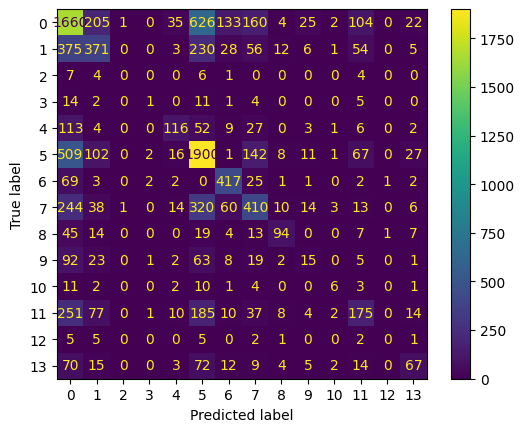

In [446]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn = confusion_matrix(y_test, y_test_predict_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.show()

In [447]:
#Да, это переобучение. Но опытным путём это оказалось лучше, чем недообучение
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.49838064393217757)

# Random Forest

In [53]:
from sklearn import ensemble

#Максимальную глубину дерева необходимо задать для избежания переобучения
#'class_weight=balanced_subsample' - не сделал лучше, только хуже
rf = ensemble.RandomForestClassifier(n_estimators = 1000, max_depth = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [54]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
y_test_predict_rf = rf.predict(X_test)
err_test_rf  = np.mean(y_test  != y_test_predict_rf)
err_test_rf

np.float64(0.4574204610401981)

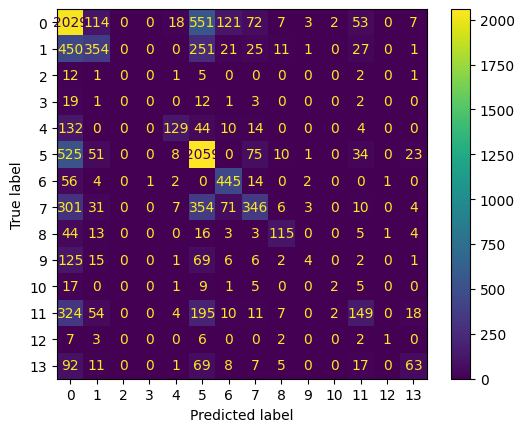

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_test_predict_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

In [57]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8746308469086406, 0.5425795389598018)

# Градиентный бустинг

In [58]:
from lightgbm import LGBMClassifier

#Балансировка классов
class_weights = len(y_train) / (len(np.bincount(y_train)) * np.bincount(y_train))
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

gb = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    #class_weight=class_weight_dict, #ухудшает результат
    objective = 'multiclass',
    num_class=14
)
gb.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 41988, number of used features: 22
[LightGBM] [Info] Start training from score -1.260257
[LightGBM] [Info] Start training from score -2.219184
[LightGBM] [Info] Start training from score -6.190792
[LightGBM] [Info] Start training from score -5.614701
[LightGBM] [Info] Start training from score -3.451453
[LightGBM] [Info] Start training from score -1.326662
[LightGBM] [Info] Start training from score -2.995447
[LightGBM] [Info] Start training from score -2.226000
[LightGBM] [Info] Start training from score -3.939500
[LightGBM] [Info] Start training from score -3.818594
[LightGBM] [Info] Start training from score -5.569965
[LightGBM] [Info] Start training from score -2.607273

LGBMClassifier(n_estimators=400, num_class=14, objective='multiclass',
               random_state=42)

In [59]:
gb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': 'multiclass',
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'num_class': 14}

In [60]:
y_test_predict_gb = gb.predict(X_test)
err_test_gb  = np.mean(y_test  != y_test_predict_gb)
err_test_gb

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


np.float64(0.4529434177938655)

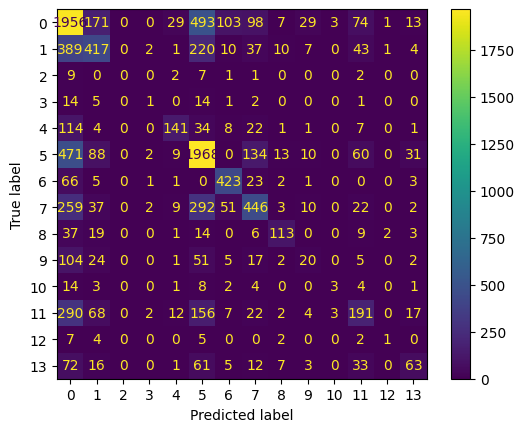

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_gb = confusion_matrix(y_test, y_test_predict_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.show()

In [62]:
gb.score(X_train, y_train), gb.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(0.8289987615509193, 0.5470565822061345)

# Выводы
1) На улучшение точности оказывают влияние следующие факторы
- удаление неинформативных и некорректных признаков (было слелано)
- удаление коррелирующих признаков (было сделано)
- удаление выбросов (хотя физически это не ошибки, но они мешают, было сделано)
- тщательный подбор гипперпараметров моделей (было сделано руками)
2) Несбалансированность классов сложно побороть, и не всегда это даёт улучшение результата (у нас оно лишь улучшило kNN, но другие модели без балансировки справились лучше чем с ней и лучше чем kNN). Очевидным решением было бы удалить или обощить маленькие классы, но автор (я) решил выжать лучшее из того что есть и не менять классы.
3) Лучше всего справился градиентный бустинг GBT, потому что он больше предназначен для таких задач с многоклассовстью и несбалансированностью. Вероятно его хороший результат обусловлен дополнительным удалением на его взгляд неинформативных признаков и удачной подборкой параметров.
4) Остается нерешенной проблема, из-за которой 1 ('Agricultural Activities')
и 13 ('Trash Burning') типы пожаров часто путаются (согласно confusion_matrix).
5) В силу различных причин не удалось поднять точность на тестах выше 54%. Возможно требуется дополнительная обработка данных.